In [53]:
num_qubits_list = [5]
num_trial = 1

In [54]:
from qiskit_aer import AerSimulator
from qiskit import Aer
from qiskit import transpile

In [115]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
import numpy as np
from qiskit_aer.noise import pauli_error
from tqdm import tqdm

def string_1s(n):
    ssss = '1'
    for i in range(n-1):
        ssss+='1'
    return ssss

def string_0s(n):
    ssss = '0'
    for i in range(n-1):
        ssss+='0'
    return ssss

def return_to_bits(bit_string) :
    b = int(bit_string,2)
    return b

counts_list_list = []
for n in num_qubits_list:
    ##### number of qubits #####

    ##### number of shots #####
    shots_num = 10000

    ##### circuit setting ######
    q0 = QuantumRegister(n, 'qm') # message
    q1 = QuantumRegister(n-1, 'qa') # ancillar
    c0 = ClassicalRegister(n, 'cm')
    c1 = ClassicalRegister(n-1, 'ca')
    circuit = QuantumCircuit(q0, q1, c0, c1)

    ##### encoding a physical qubit into a logical qubit #####
    for i in range(1,n):
        circuit.cx(q0[0],q0[i])
        
    ##### convert phase flip into bit flip #####
    circuit.h(q0)
    circuit.barrier(q0, q1)
    
    ##### introduce errors #####
    circuit.z(q0[0])
    circuit.z(q0[1])
#     circuit.z(q0[1])
    circuit.barrier(q0, q1)
    
    ##### convert phase flip into bit flip #####
    circuit.h(q0)
    
    ##### make ancilla qubits #####
    for i in range(0, n-1):
        circuit.cx(q0[0], q1[i])
        circuit.cx(q0[i+1], q1[i])
    circuit.barrier(q0, q1)
    

    ##### measure ancillas #####
    circuit.measure(q1,c1)
    circuit.barrier(q0,q1)

    ##### correction circuit #####
    num_list_list = [
        [0b1111,0b1110,0b1101,0b1011,0b0111],
        [0b0001,0b1110,0b0011,0b0101,0b1001],
        [0b0010,0b1101,0b0011,0b0110,0b1010],
        [0b0100,0b1011,0b0101,0b0110,0b1100],
        [0b1000,0b0111,0b1001,0b1010,0b1100],
    ]
    for j_qubit, num_list in enumerate(num_list_list):
        for num in num_list:
            circuit.x(q0[j_qubit]).c_if(c1,num)
#     for num in [0b1111,0b1110,0b1101,0b1011,0b0110]:
#         circuit.x(q0[0]).c_if(c1,num)
#     for num in []:
#         circuit.x(q0[1]).c_if(c1,num)

#     p = 2**(n-1)
#     circuit.x(q0[0]).c_if(c1,2**(n-1)-1)
#     for i in range(0, n-1):
#         circuit.x(q0[i+1]).if(c1,2**(i))
        
#         circuit.x(q0[i+1]).c_if(c1,2**(n-2-i))
#     circuit.x(q0[2]).c_if(c1[2],1)

    circuit.barrier(q0,q1)
    ##### result measurement #####
    circuit.measure(q0,c0)

    ##################################################
#     from qiskit import Aer, execute

    backend = Aer.get_backend('qasm_simulator')

#     from qiskit.providers.fake_provider  import FakeMumbai
#     backend = FakeMumbai()

#     backend = AerSimulator()
    tcirc = transpile(circuit, backend)

    ##################################################

    n_data = []
    counts_list = []
    for iteration_number in tqdm(range(num_trial)):
        
        iteration_data = []
        
        string_0 = string_0s(n)
        string_1 = string_1s(n)
        
#         job = execute(tcirc, backend, shots=shots_num)
        job = backend.run(tcirc, shots=shots_num)
        result = job.result()
        counts = result.get_counts(tcirc)
        
        counts_list.append(counts)
        print(f"n={n}: {counts}")
    
    counts_list_list.append(counts_list)

#         bit_total_result = list(counts.keys())
#         num_000 = 0
#         for bits in bit_total_result :
#             if bits.split()[1] == string_0 :
#                 num_000 += counts[bits]
#         print("Measured number of outcome '" + string_0 + "':", num_000)

#         num_111 = 0
#         for bits in bit_total_result :
#             if bits.split()[1] == string_1 :
#                 num_111 += counts[bits]
#         print("Measured number of outcome '" + string_1 + "':", num_111)
            
#         ########    
        
#         num_eff000 = 0
#         for bits in bit_total_result :
#             if bin(return_to_bits(bits.split()[1]) ^ return_to_bits(string_0))[2:].count('1') < (n+1)/2 :
#             #if bits.split()[1] == '000' or bits.split()[1] == '001' or bits.split()[1] == '010' or bits.split()[1] == '100' :
#                 num_eff000 += counts[bits]
#         print("Measured number of outcome considered as '" + string_0 + "':", num_eff000)

#         num_eff111 = 0
#         for bits in bit_total_result :
#             if bin(return_to_bits(bits.split()[1]) ^ return_to_bits(string_1))[2:].count('1') < (n+1)/2 :
#             #if bits.split()[1] == '111' or bits.split()[1] == '110' or bits.split()[1] == '101' or bits.split()[1] == '011' :
#                 num_eff111 += counts[bits]
#         print("Measured number of outcome considered as '" + string_1 + "':", num_eff111)
        
#         ########
        
#         iteration_data.append([num_000, num_111, num_eff000, num_eff111])
#         n_data.append(iteration_data)
        
#     np.save(str(n) + "_qubits.npy", np.array(n_data))

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.55it/s]

n=5: {'1110 00000': 10000}


In [116]:
int('1111',base=2)

15

In [117]:
counts_list_list

[[{'1110 00000': 10000}]]

In [118]:
counts_list_list[0][0]

{'1110 00000': 10000}

In [119]:
from qiskit.visualization import plot_histogram

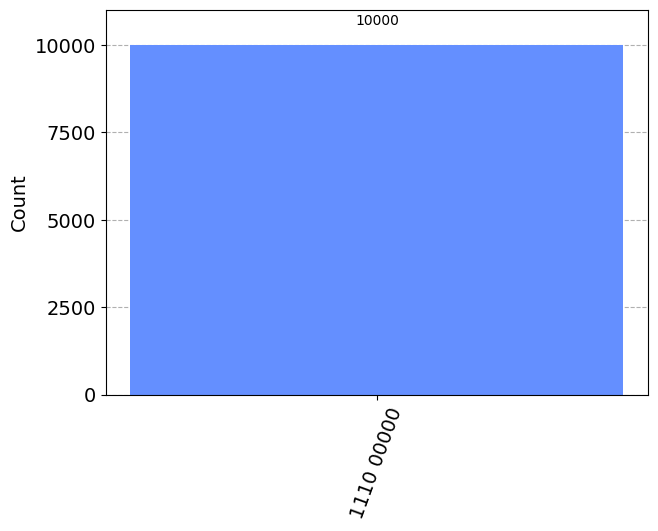

In [120]:
plot_histogram(counts_list_list[0][0])

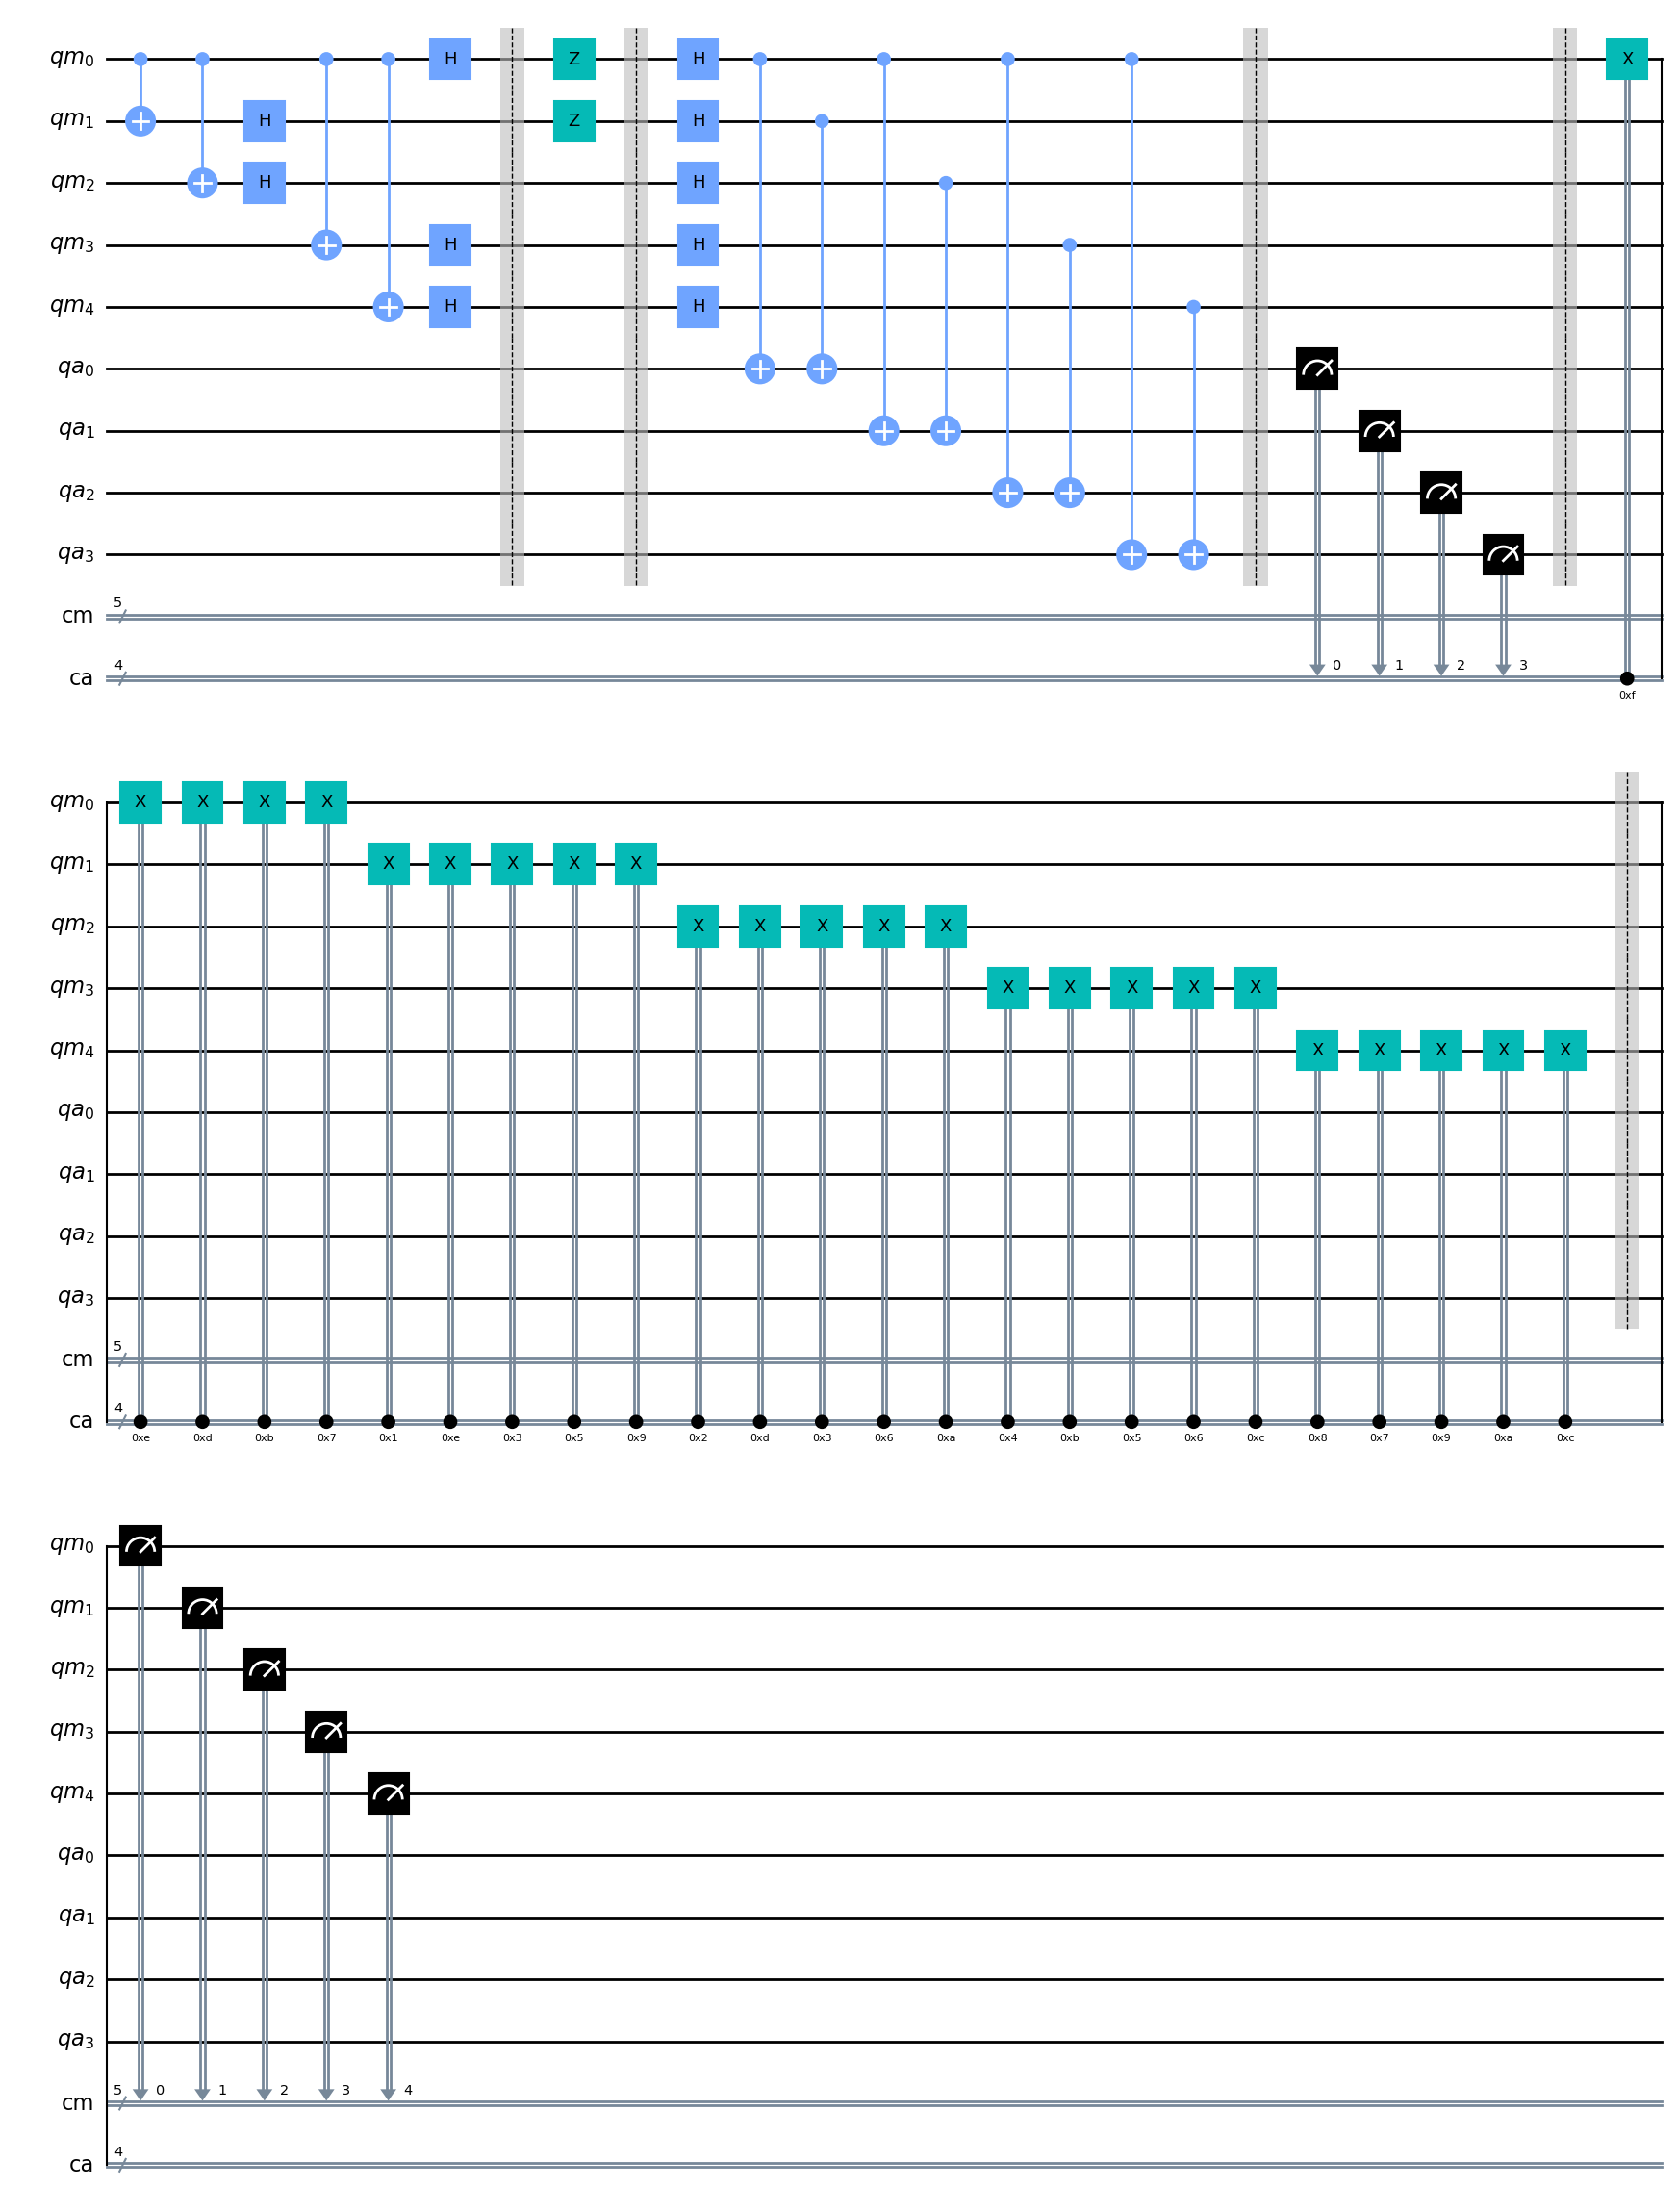

In [121]:
circuit.draw('mpl', filename='circuit')

In [63]:
tcirc.draw()

┌───┐ ░ ┌───┐ ░ ┌───┐               »
qm_0: ──■─────────■─────────■─────────■──┤ H ├─░─┤ Z ├─░─┤ H ├──■────■───────»
      ┌─┴─┐┌───┐  │         │         │  └───┘ ░ ├───┤ ░ ├───┤  │    │       »
qm_1: ┤ X ├┤ H ├──┼─────────┼─────────┼────────░─┤ Z ├─░─┤ H ├──┼────┼────■──»
      └───┘└───┘┌─┴─┐┌───┐  │         │        ░ └───┘ ░ ├───┤  │    │    │  »
qm_2: ──────────┤ X ├┤ H ├──┼─────────┼────────░───────░─┤ H ├──┼────┼────┼──»
                └───┘└───┘┌─┴─┐┌───┐  │        ░       ░ ├───┤  │    │    │  »
qm_3: ────────────────────┤ X ├┤ H ├──┼────────░───────░─┤ H ├──┼────┼────┼──»
                          └───┘└───┘┌─┴─┐┌───┐ ░       ░ ├───┤  │    │    │  »
qm_4: ──────────────────────────────┤ X ├┤ H ├─░───────░─┤ H ├──┼────┼────┼──»
                                    └───┘└───┘ ░       ░ └───┘  │    │    │  »
qa_0: ─────────────────────────────────────────░───────░────────┼────┼────┼──»
                                               ░       ░        │    │    │  »
qa_1: ─────────────────────────────────────────░───────░────────┼────┼────┼──»
                                               ░       ░        │  ┌─┴─┐  │  »
qa_2: ─────────────────────────────────────────░───────░────────┼──┤ X ├──┼──»
                                               ░       ░      ┌─┴─┐└───┘┌─┴─┐»
qa_3: ─────────────────────────────────────────░───────░──────┤ X ├─────┤ X ├»
                                               ░       ░      └───┘     └───┘»
cm: 5/═══════════════════════════════════════════════════════════════════════»
                                                                             »
ca: 4/═══════════════════════════════════════════════════════════════════════»
                                                                             »
«                                ░              ░  ┌───┐                      »
«qm_0: ──■─────────■─────────────░──────────────░──┤ X ├──────────────────────»
«        │         │             ░              ░  └─╥─┘  ┌───┐               »
«qm_1: ──┼─────────┼─────────────░──────────────░────╫────┤ X ├───────────────»
«        │         │             ░              ░    ║    └─╥─┘  ┌───┐        »
«qm_2: ──┼────■────┼─────────────░──────────────░────╫──────╫────┤ X ├────────»
«        │    │    │             ░              ░    ║      ║    └─╥─┘  ┌───┐ »
«qm_3: ──┼────┼────┼────■────────░──────────────░────╫──────╫──────╫────┤ X ├─»
«        │    │    │    │        ░              ░    ║      ║      ║    └─╥─┘ »
«qm_4: ──┼────┼────┼────┼────■───░──────────────░────╫──────╫──────╫──────╫───»
«        │    │  ┌─┴─┐  │  ┌─┴─┐ ░ ┌─┐          ░    ║      ║      ║      ║   »
«qa_0: ──┼────┼──┤ X ├──┼──┤ X ├─░─┤M├──────────░────╫──────╫──────╫──────╫───»
«      ┌─┴─┐  │  └───┘┌─┴─┐└───┘ ░ └╥┘┌─┐       ░    ║      ║      ║      ║   »
«qa_1: ┤ X ├──┼───────┤ X ├──────░──╫─┤M├───────░────╫──────╫──────╫──────╫───»
«      └───┘┌─┴─┐     └───┘      ░  ║ └╥┘┌─┐    ░    ║      ║      ║      ║   »
«qa_2: ─────┤ X ├────────────────░──╫──╫─┤M├────░────╫──────╫──────╫──────╫───»
«           └───┘                ░  ║  ║ └╥┘┌─┐ ░    ║      ║      ║      ║   »
«qa_3: ──────────────────────────░──╫──╫──╫─┤M├─░────╫──────╫──────╫──────╫───»
«                                ░  ║  ║  ║ └╥┘ ░    ║      ║      ║      ║   »
«cm: 5/═════════════════════════════╬══╬══╬══╬═══════╬══════╬══════╬══════╬═══»
«                                   ║  ║  ║  ║    ┌──╨──┐┌──╨──┐┌──╨──┐┌──╨──┐»
«ca: 4/═════════════════════════════╩══╩══╩══╩════╡ 0xf ╞╡ 0x8 ╞╡ 0x4 ╞╡ 0x2 ╞»
«                                   0  1  2  3    └─────┘└─────┘└─────┘└─────┘»
«              ░ ┌─┐            
«qm_0: ────────░─┤M├────────────
«              ░ └╥┘┌─┐         
«qm_1: ────────░──╫─┤M├─────────
«              ░  ║ └╥┘┌─┐      
«qm_2: ────────░──╫──╫─┤M├──────
«              ░  ║  ║ └╥┘┌─┐   
«qm_3: ────────░──╫──╫──╫─┤M├───
«       ┌───┐  ░  ║  ║  ║ └╥┘┌─┐
«qm_4: ─┤ X ├──░──╫──╫──╫──╫─┤M├
«       └─╥─┘  ░  ║  ║  ║  ║ └╥┘
«qa_0: ───╫────░──╫──